In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lightgbm as lgb
root = "../"
pd.set_option('display.max_columns', 50)

# 2016 data

**TODO**: 
- aggiungere ore lavorative settimanali, anni di esperienza, etc. (da allegati)
- normalizzare per media annuale 2019
- lavori multipli? 

main:
- rper16.csv # v redditi personali
- carcom16.csv # v caratteristiche componenti  

potentially useful:
- allb1.csv # ? allegato LAVORATORI DIPENDENTI
- allb2.csv # ? allegato LIBERI PROFESSIONISTI, IMPRENDITORI INDIVIDUALI, LAVORATORI AUTONOMI, LAVORATORE ATIPICO
- allb3.csv" # ? allegato IMPRESE FAMILIARI
- allb4.csv" # ? allegato SOCI/GESTORI DI SOCIETA' 

useless:
- q16*.csv # x 
- pesijack16.csv # x
- allb5.csv" # x allegato PENSIONATI
- allb6.csv" # x allegato ALTRE ENTRATE QUALI BORSE DI STUDIO, ASSEGNI PER ALIMENTI, 
- alld1.csv # x BENI IMMOBILI POSSEDUTI ALLA FINE DEL 2016
- alld2res.csv,alld2aimm.csv,alld2fam.csv,alld2prof.csv # x INDEBITAMENTO



**rper variables**
- YL = Reddito da lavoro dipendente
- YL1 = Retribuzioni nette          (B1.7)
- YL2 = Integrazioni non monetarie  (B1.9)
- YM = Reddito netto da lavoro autonomo
- YMA1 = Reddito netto da lavoro autonomo (B2.10 + B3.9)
- YMA2 = Utili e altri redditi da partecipazione (B4.7 + B4.8)


**carcom variables**

from the legend:
- SEX
- ETA = età in anni
- CLETA5 = classe di età (1=fino a 34 anni, 2=35-44, 3=45-54, 4=55-64, 5=oltre 65)
- PERL = percettore di reddito da lavoro
- Q = status del lavoratore (1=dipendente, 2=autonomo, 3=condiz. non professionale)
- QUAL = status del lavoratore (1=operaio, 2=impiegato, 3=dirigente/direttivo, 4=imprenditore/libero
professionista, 5=altro autonomo, 6=pensionato, 7=altri non occupati)
- ISCO = classificazione ISCO delle professioni
- SETT = settore di attività (1=agricoltura, 2=industria, 3=servizi pubblici, 4=altri settori, 5=nessun
settore)
- AREA3 = area geografica (1=Nord, 2=Centro, 3=Sud e Isole)
- AREA5 = area geografica (1=Nord Ovest, 2=Nord Est, 3=Centro, 4=Sud, 5=Isole)
- IREG = codice Istat della regione di residenza (1=Piemonte, 2=Valle d'Aosta, 3=Lombardia,
4=Trentino, 5=Veneto, 6=Friuli, 7=Liguria, 8=Emilia Romagna, 9=Toscana, 10=Umbria, 11=Marche, 12=Lazio, 13=Abruzzo, 14=Molise, 15=Campania, 16=Puglia, 17=Basilicata, 18=Calabria, 19=Sicilia, 20=Sardegna)
- ACOM4C = ampiezza demografica del comune (0=fino a 20.000 abitanti, 1=20.000-40.000, 2=40.000-500.000, 3=oltre 500.000)
- ACOM5 = ampiezza demografica del comune (1=fino a 5.000 abitanti, 2=5.000-20.000, 3=20.000-50.000, 4=50.000-200.000, 5=oltre 200.000)

but:
[
	'nquest',
	'NCOMP',
	'nord',
	'sex',
	'parent',
	'anasc',
	'cit',
	'aningr',
	'motiv',
	'staciv',
	'studio',
	'tipolau',
	'votoedu',
	'suedu',
	'selode',
	'annoedu',
	'tipodip',
	'univer',
	'apqual',
	'asnonoc',
	'nace',
	'nordp',
	'motent',
	'annoenus',
	'NASCREG',
	'NASCAREA',
	'ireg',
	'ETA',
	'isco',
	'CLETA5',
	'QUAL',
	'Q',
	'SETT',
	'CFRED',
	'PERC',
	'PERL',
	'NPERL',
	'NPERC',
	'AREA3',
	'AREA5',
	'ACOM4C',
	'ACOM5',
	'PESOFIT',
]



#### *APQUAL

OCCUPATO DIPENDENTE
-operaio o posizione similare (inclusi salariati e apprendisti, lavoranti a domicilio, commessi) ... - impiegato ........................................................
- insegnante di qualunque tipo di scuola
(inclusi incaricati, contrattisti e simili) ................ - impiegato direttivo/quadro ................................
- dirigente, alto funzionario, preside, direttore didattico, docente universitario, magistrato .......
OCCUPATO INDIPENDENTE
- libero professionista .......................................... - imprenditore individuale..................................... - lavoratore autonomo/artigiano .......................... - titolare o coadiuvante di impresa familiare........ - socio/gestore di società .....................................
- lavoro atipico (Co.Co.Co, collaborazioni occasionali, lavoro a progetto ecc....) ................
NON OCCUPATO
- in cerca di prima occupazione .......................... - disoccupato ....................................................... - casalinga/o ...................................................... - benestante ......................................................... - pensionato da lavoro ......................................... - pensionato non da lavoro
(invalidità/reversibilità/sociale) ........................... - studente (dalla prima elementare in poi) ........... - bambino in età prescolare ................................. - volontario............................................................
 
• ALTRO


#### * NACE

- Agricoltura, silvicoltura e pesca ....................................................
- Attività estrattive ...........................................................................
- Attività manifatturiere ....................................................................
- Fornitura di energia elettrica, gas, vapore e aria condizionata.....
- Fornitura di acqua; reti fognarie, attività di trattamento dei rifiuti e risanamento ....................................................................................
- Costruzioni ....................................................................................
- Commercio all’ingrosso e al dettaglio; riparazioni di autoveicoli e motocicli ..........................................................................................
- Trasporto e magazzinaggio ..........................................................
- Servizi di alloggio e di ristorazione ...............................................
- Servizi di informazione e comunicazione......................................
- Attività finanziarie e assicurative...................................................
- Attività immobiliari .........................................................................
- Attività professionali, scientifiche e tecniche ................................
- Attività amministrative e di servizi di supporto..............................
- Amministrazione pubblica e difesa; assicurazione sociale obbligatoria......................................................................................
- Istruzione ......................................................................................
- Sanità e assistenza sociale ..........................................................
- Attività artistiche, di intrattenimento e divertimento ...................... -Altre attività di servizi ..................................................................... -Attività di famiglie e convivenze come datori di lavoro per personale domestico; produzione di beni e servizi indifferenziati per uso proprio da parte di famiglie e convivenze ................................ -Attività di organizzazioni e organismi extraterritoriali

In [12]:
allb1_feat = [
    "nquest", # family id
    "nord", # person in family id
    'ylm', # Reddito complessivo netto annuo
    'attivp', # attività principale o secondaria?
    'partime', # part-time?
    'contratt',# type of contract?
    'tuttanno', # ha lavorato tutto l'anno?
    'mesilav', # se no, quanti mesi??
    'dimaz', # numero di persone stabilmente occupate, dipendenti in tutta Italia
    'oretot', # ore lavorative 
    'attest', # in italia? 
    #'pstra',
    #'orestra',
    #'b1bonus',
    #'integ',
    #'ylnm',
    #'contaz_1',
    #'contaz_2',
    #'contaz_3',
]

carcom_feat = [
    "nquest", # family id
    "nord", # person in family id
    'NCOMP', # numero di componenti della famiglia
    'NPERC', # numero di percettori della famiglia
    'NPERL', # numero di percettori di reddito da lavoro della famiglia
    'sex', # sesso
    'cit', # cittadinanza italiana
    'studio', # titolo studio
    'tipolau', # tipo laurea
    'votoedu', # voto: x punti 
    'suedu', # su y punti
    'selode', # con lode?
    'annoedu', # anno laurea
    'tipodip', # tipo diploma
    'apqual', # *
    'nace', # ** 
    'ireg',  # ISTAT code regione
    'ETA', # età in anni
    'isco', # classificazione ISCO delle professioni
    'CLETA5', # classe di età
    'QUAL', # status del lavoratore
    'SETT', # settore di attività  
    'AREA3', # area (less)
    'AREA5', # area 
    'ACOM4C', # ampiezza comune (less?)
    'ACOM5', # ampiezza comune 
    #'Q', # status del lavoratore (less)
    #'asnonoc',
    #'CFRED',
    #'PERC', 
    #'NPERL',
    #'NPERC',
    #'parent', # Posizione nella famiglia
    #'aningr',
    #'motiv',
    #'staciv',
    #'nordp',
    #'motent',
    #'annoenus',
    #'NASCREG',
    #'NASCAREA',
    #'PESOFIT',
]

names_map = {'nquest' : 'id_famiglia',
            'nord' : 'id_persona',
            'ylm' : 'reddito_netto',
            'attivp' : 'attivita_princ',
            'contratt' : 'contratto',
            'attest' : 'in_italia',
            'dimaz' : 'dimensioni_azienda',
            'oretot' : 'ore_settimana',
            'cit' : 'cit_italiana',
            'studio' : 'titolo_studio',
            'tipolau' : 'tipo_laurea',
            'tipodip' : 'tipo_diploma',
            'apqual' : 'qualifica',
            'nace' : 'settore',
            'ireg' : 'regione',
            'isco' : 'codice_lavoro_isco',
            'CLETA5' : 'eta_discreta_5',
            'QUAL' : 'status_lavoratore',
            'SETT' : 'settore_less',
            'AREA3' : 'zona_less',
            'AREA5' : 'zona',
            'ACOM4C' : 'ampiezza_comune_less',
            'ACOM5' : 'ampiezza_comune',
            'NCOMP' : 'n_comp_famiglia',
            'NPERC' : 'n_percett_famiglia', 
            'NPERL' : 'n_lavor_famiglia', 
            }

In [17]:
path = root + "data/2_bancaditalia/2016/ind16_ascii/"

# load and merge
allb1 = pd.read_csv(path + 'allb1.csv')[allb1_feat]
carcom = pd.read_csv(path + "carcom16.csv")[carcom_feat]
keys = ["nquest","nord"]
df = pd.merge(allb1,carcom,on=keys,how="left")

# change naming
df = df.rename(columns = names_map)

# add variables
df["voto_perc"] = df["votoedu"] / df["suedu"]
df["anno"] = int(2016)

# reddito dipendente positivo
df = df[df.reddito_netto>0].reset_index(drop=True)

In [70]:
print(df.shape)
df.head()

(4511, 37)


,id_famiglia,id_persona,reddito_netto,attivita_princ,partime,contratto,tuttanno,mesilav,in_italia,dimensioni_azienda,ore_settimana,n_comp_famiglia,n_percett_famiglia,n_lavor_famiglia,sex,cit_italiana,titolo_studio,tipo_laurea,votoedu,suedu,selode,annoedu,tipo_diploma,qualifica,settore,regione,ETA,codice_lavoro_isco,eta_discreta_5,status_lavoratore,settore_less,zona_less,zona,ampiezza_comune_less,ampiezza_comune,voto_perc,anno
0,1763,2,6000.0,1,1,2.0,2,5.0,1,3,40,2,2,1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,17,62,92.0,4,1,1,3,4,0,1,NaN,2016
1,5416,1,10000.0,1,1,1.0,1,12.0,1,1,30,5,4,4,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1,17.0,8,58,32.0,4,1,3,1,2,2,4,NaN,2016
2,5416,2,9000.0,1,1,1.0,1,12.0,1,2,35,5,4,4,2,1,5,NaN,68.0,100.0,0.0,1998.0,2.0,1,17.0,8,37,91.0,2,1,3,1,2,2,4,0.68,2016
3,5416,3,8000.0,1,1,1.0,1,12.0,1,1,20,5,4,4,2,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1,9.0,8,25,51.0,1,1,4,1,2,2,4,NaN,2016
4,5416,4,16000.0,1,1,1.0,1,12.0,1,2,40,5,4,4,1,1,3,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,8,35,72.0,2,1,2,1,2,2,4,NaN,2016


In [71]:
df.describe()

,id_famiglia,id_persona,reddito_netto,attivita_princ,partime,contratto,tuttanno,mesilav,in_italia,dimensioni_azienda,ore_settimana,n_comp_famiglia,n_percett_famiglia,n_lavor_famiglia,sex,cit_italiana,titolo_studio,tipo_laurea,votoedu,suedu,selode,annoedu,tipo_diploma,qualifica,settore,regione,ETA,codice_lavoro_isco,eta_discreta_5,status_lavoratore,settore_less,zona_less,zona,ampiezza_comune_less,ampiezza_comune,voto_perc,anno
count,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4510.000000,4511.000000,4420.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,873.000000,2606.000000,2606.000000,2606.000000,2606.000000,2606.000000,4511.000000,4473.000000,4511.000000,4511.000000,4354.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,4511.000000,2606.000000,4511.0
mean,834137.369319,1.699845,16773.455553,1.022833,1.166260,1.217738,1.136998,11.434615,1.006429,4.156950,36.235868,2.966305,1.974950,1.710042,1.450676,1.083573,4.600532,5.699885,66.967383,79.140445,0.067536,1993.214505,2.578665,2.226114,11.061704,9.519397,45.834626,52.997244,2.671691,1.782975,3.310574,1.835513,2.684327,1.417424,3.234094,0.834550,2016.0
std,175327.933822,0.868721,8631.653003,0.149388,0.372355,0.475662,0.398260,1.906985,0.079930,2.519321,8.905030,1.286367,0.856975,0.761422,0.497616,0.276778,1.473051,2.860954,31.424957,31.231982,0.250997,12.285302,1.154707,2.508406,6.044612,5.658736,11.756478,24.501855,1.107200,1.138184,0.908678,0.865699,1.307363,0.939287,1.153496,0.130078,0.0
min,1763.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,0.000000,1958.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.212121,2016.0
25%,856218.000000,1.000000,12000.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,2.000000,35.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,44.000000,60.000000,0.000000,1983.000000,2.000000,1.000000,6.000000,5.000000,37.000000,33.000000,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,0.727273,2016.0
50%,905311.000000,1.000000,16500.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,4.000000,40.000000,3.000000,2.000000,2.000000,1.000000,1.000000,5.000000,6.000000,64.000000,100.000000,0.000000,1992.000000,2.000000,2.000000,11.000000,9.000000,48.000000,51.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,3.000000,0.833333,2016.0
75%,917927.000000,2.000000,20000.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,7.000000,40.000000,4.000000,2.000000,2.000000,2.000000,1.000000,5.000000,9.000000,100.000000,110.000000,0.000000,2004.000000,3.000000,2.000000,17.000000,15.000000,55.000000,72.000000,4.000000,2.000000,4.000000,3.000000,4.000000,2.000000,4.000000,0.954545,2016.0
max,928513.000000,8.000000,100000.000000,2.000000,2.000000,3.000000,3.000000,12.000000,2.000000,8.000000,60.000000,11.000000,6.000000,5.000000,2.000000,2.000000,8.000000,10.000000,110.000000,120.000000,1.000000,2017.000000,6.000000,21.000000,22.000000,20.000000,85.000000,96.000000,5.000000,7.000000,5.000000,3.000000,5.000000,3.000000,5.000000,1.000000,2016.0


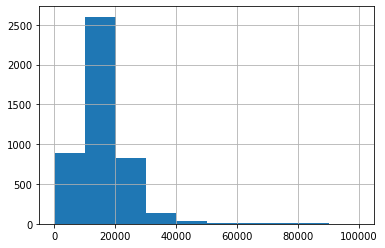

In [72]:
df.reddito_netto.hist()
plt.show()

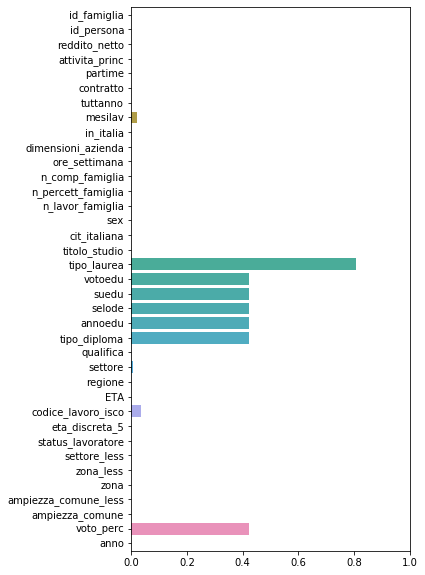

In [73]:
# missing values
plt.figure(figsize=(5,10))
sns.barplot(y=df.isnull().mean().index,x=df.isnull().mean().values)
plt.xlim(0,1)
plt.show()

In [75]:
df.attivita_princ.value_counts() # remove?

1    4408
2     103
Name: attivita_princ, dtype: int64

In [77]:
df.partime.value_counts()

1    3761
2     750
Name: partime, dtype: int64

In [76]:
df.contratto.value_counts()

1.0    3654
2.0     730
3.0     126
Name: contratto, dtype: int64

In [78]:
df.tuttanno.value_counts() # select only 1 and discard mesilav?

1    3984
2     436
3      91
Name: tuttanno, dtype: int64

In [82]:
df.in_italia.value_counts() # discard in italia=2

1    4482
2      29
Name: in_italia, dtype: int64

In [91]:
df.cit_italiana.value_counts()

1    4134
2     377
Name: cit_italiana, dtype: int64

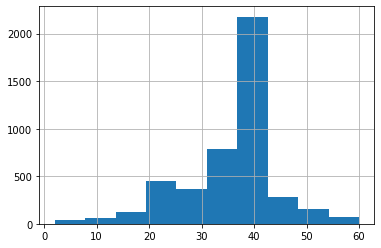

In [88]:
df.ore_settimana.hist()
plt.show()

In [90]:
df.ore_settimana.min(),df.ore_settimana.max()

(2, 60)

In [93]:
df.tipo_laurea.value_counts()

9.0     244
6.0     128
1.0     118
3.0      95
4.0      88
7.0      77
8.0      61
2.0      30
5.0      30
10.0      2
Name: tipo_laurea, dtype: int64

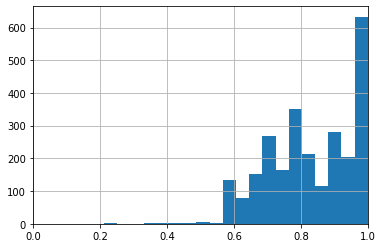

In [101]:
df.voto_perc.hist(bins=20)
plt.xlim(0,1)
plt.show()

In [125]:
df.qualifica.value_counts()

1     2111
2     1576
3      311
4      203
5      121
12      80
15      41
6       15
13      10
17      10
20       9
9        4
10       4
16       4
11       4
8        4
21       2
7        1
19       1
Name: qualifica, dtype: int64

In [114]:
all_cols = [
    #'id_famiglia',
    #'id_persona',
    #'reddito_netto',
    #'attivita_princ',
    'partime',
    'contratto',
    'tuttanno',
    'mesilav',
    'in_italia',
    'dimensioni_azienda',
    'ore_settimana',
    #'n_comp_famiglia', # <--- usa per calcolare stipendio annuale lordo
    #'n_percett_famiglia',# <--- usa per calcolare stipendio annuale lordo
    #'n_lavor_famiglia',# <--- usa per calcolare stipendio annuale lordo
    'sex', # politically scorrect?
    'cit_italiana',# politically scorrect?
    'titolo_studio',
    'tipo_laurea',
    #'votoedu',
    #'suedu',
    'selode',
    'annoedu',
    'tipo_diploma',
    'qualifica', 
    'settore',
    'regione', # <--- usa per calcolare stipendio annuale lordo
    'ETA',
    'codice_lavoro_isco',
    'eta_discreta_5',
    'status_lavoratore',
    'settore_less',
    'zona_less',
    'zona',
    'ampiezza_comune_less',
    'ampiezza_comune',
    'voto_perc',
    #'anno', 2016
]

## A simple model

n. rows: 4464
range: 900.0 55000.0
baseline mape: 84.3


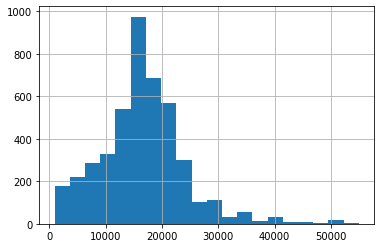

In [116]:
df_sel = df.copy()

# drop extrema
alpha = .01
low = df_sel.reddito_netto.quantile(alpha / 2)
high = df_sel.reddito_netto.quantile(1 - alpha / 2)
df_sel = df_sel[(low < df_sel.reddito_netto) & (df_sel.reddito_netto < high)]

# show
print("n. rows:",df_sel.shape[0])
print("range:",df_sel.reddito_netto.min(),df_sel.reddito_netto.max())
baseline_mape = ((df.reddito_netto - df.reddito_netto.median()) / df.reddito_netto).abs().mean()
print("baseline mape: {}".format(round(100*baseline_mape,2)))
df_sel.reddito_netto.hist(bins=20)
plt.show()

In [120]:
# ------------ FEATURES ------------
cat_feat = [
    'partime',
    'contratto',
    'tuttanno',
    'in_italia',
    'dimensioni_azienda',
    'sex', # politically scorrect?
    'cit_italiana',# politically scorrect?
    'titolo_studio',
    'tipo_laurea',
    'selode',
    'tipo_diploma',
    'qualifica', 
    'settore',
    'regione',
    'codice_lavoro_isco',
    'eta_discreta_5',
    'status_lavoratore',
    'settore_less',
    'zona_less',
    'zona',
    'ampiezza_comune_less',
    'ampiezza_comune',
]

num_feat = [
    'mesilav',
    'ore_settimana',
    'annoedu',
    'ETA',
    'voto_perc',
]

# ------------ PARAMETERS ------------
params = dict(
    objective="mape",
    metrics = ["l1","mape"], 
    learning_rate = 1e-1,
    reg_sqrt = True,
)
num_boost_rounds=300

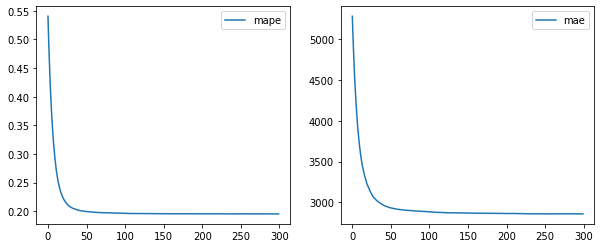

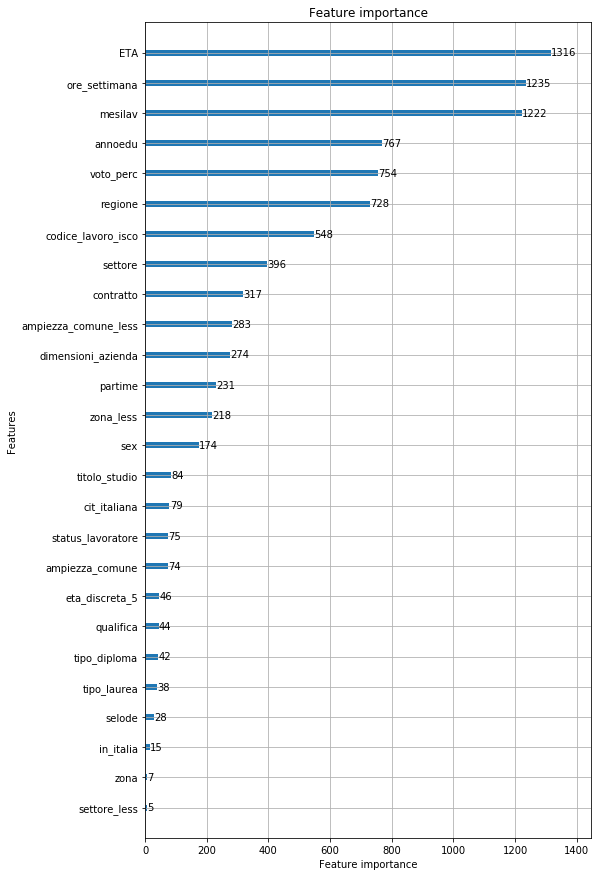

In [124]:
# prepare dataset
feat = num_feat + cat_feat
X = df_sel[feat].copy().reset_index(drop=True)
y = df_sel["reddito_netto"].reset_index(drop=True)
X[cat_feat] = X[cat_feat].astype("category")
data = lgb.Dataset(X,y, categorical_feature=cat_feat,free_raw_data=False)

# cross-validate
scores = lgb.cv(params,data,num_boost_rounds,stratified=False)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(scores['mape-mean'], label = "mape")
plt.legend()
plt.subplot(1,2,2)
plt.plot(scores['l1-mean'], label = "mae")
plt.legend()
plt.show()

# feature importances
bst = lgb.train(params,data,num_boost_rounds)
lgb.plot_importance(bst,figsize = (8,15))
plt.show()